In [17]:
import pandas as pd
import json
from os import walk
import os
%matplotlib inline

In [18]:
import matplotlib.pyplot as plt

In [83]:
datapath = '/Users/nathanhelm-burger/Documents/Dropbox/Stats_Programming/botcatcher_data/datanew/'
datapath_mv = '/Users/nathanhelm-burger/Documents/Dropbox/Stats_Programming/botcatcher_data/data/'

In [84]:
allfiles = []
for (dirpath, dirnames, filenames) in walk(datapath_mv):
  allfiles = allfiles+filenames
  break



In [85]:
if '.DS_Store' in allfiles:
  allfiles.pop(allfiles.index('.DS_Store'))
  
print('number of files', len(allfiles))

number of files 36


In [87]:
#df = pd.DataFrame()
#for filename in allfiles:
#  temp_df = pd.read_json(datapath + filename)
#  df = df.append(temp_df)

df_mv = pd.DataFrame()
for filename in allfiles:
  temp_df = pd.read_json(datapath_mv + filename)
  df_mv = df_mv.append(temp_df)

In [90]:
print(df_mv.head())


  permalink                                          snapshots  \
0     XVO7F  [{'upv': '27581', 'views': '261,556', 'time': ...   
1     KSIdk  [{'upv': '15401', 'views': '146,681', 'time': ...   
2   5Ji5XMH  [{'upv': '10359', 'views': '393,257', 'time': ...   
3     6Iqrg  [{'upv': '5975', 'views': '75,040', 'time': '1...   
4     3c1Mf  [{'upv': '4724', 'views': '67,320', 'time': '1...   

                                               title      type  
0                                   Mindfuck Movies!     album  
1              Top Mindblowing Science Documentaries     album  
2                                  Gamers understand  animated  
3  My Reaction When my mother who has Alzheimer's...     album  
4                          A small dump of comebacks     album  


In [26]:
print(df.columns)

Index(['permalink', 'snapshots', 'title', 'type'], dtype='object')


In [92]:
#grouped = df.groupby('permalink')
most_viral_grouped = df_mv.groupby('permalink')

In [28]:
print(len(grouped), len(df))


3653 84180


In [93]:
# choosing only those posts with at least 20 timestamps
#subset = grouped.filter(lambda x: len(x) > 20)
most_viral_subset = most_viral_grouped.filter(lambda x: len(x) > 20)

In [11]:
#grouped_subset = subset.groupby('permalink')

In [12]:
len(subset)
print(subset.head())

  permalink                                          snapshots  \
0     JE4yg  [{'upv': '1', 'views': 0, 'time': '1475774950....   
1     boEgG  [{'upv': '2', 'views': 0, 'time': '1475774950....   
2     GWHg5  [{'upv': '2', 'views': 0, 'time': '1475774950....   
3     XW1X1  [{'upv': '1', 'views': 0, 'time': '1475774950....   
4     j5A4q  [{'upv': '2', 'views': 0, 'time': '1475774950....   

                      title   type  
0         Star Lord beckons  album  
1              No one knows  album  
2  birthday lol skin agario  album  
3                   getrekt  album  
4               High Score!  album  


In [111]:
def flatten_snapshots(one_post_snapshots):
  flat_snapshots = []
  for doc in one_post_snapshots:
    flat_snapshots += doc

  flat_df = pd.DataFrame(flat_snapshots)
  for col in flat_df:
    flat_df[col] = flat_df[col].map(lambda x: str(x).replace(',',''))
  flat_df.upv = flat_df.upv.astype('float32')
  flat_df.dnv = flat_df.dnv.astype('float32')
  flat_df.views = flat_df.views.astype('float32')
  flat_df.time = flat_df.time.astype('float32')
  return flat_df

In [99]:
# new_df.plot.line(x='time', y='upv')

In [112]:
# Compare three (or more) on the same graph

def graph_posts(n, filtered_df):
  #grouped_df = filtered_df.groupby('permalink')
  # grab n random posts
  perms = filtered_df.sample(n=n).loc[:,'permalink']
  # create plot object, then loop to add n lines
  plt.figure()
  for pl in perms:
    print('permalink', pl)
    #single_post = grouped_df.get_group(pl)
    single_post = filtered_df.loc[filtered_df['permalink'] == pl]
    # flatten each and append to line lists
    flat_post = flatten_snapshots(single_post.snapshots)
    # time = time - min(time) to start from initial observation
    x_line = flat_post.time - flat_post.time.min()
    y_line = flat_post['upv']
    one_post = pd.Series(y_line.values, index=x_line.values)
    one_post.plot.line()
    #print(x_line, y_line)
    #plt.plot(x=x_line.values, y=y_line.values)
  plt.legend(perms,bbox_to_anchor=(1.05, 1), loc = 2)
  y_min, y_max = plt.gca().get_ylim()
  print(plt.gca().get_ylim(), 'ylim')
  dist = y_max - y_min
  y_min = y_min - 0.1*dist
  y_max = y_max + 0.1*dist
  plt.gca().set_ylim([y_min, y_max])
  plt.show()
  plt.close()
    

permalink w1i6Y
permalink 06U3D
permalink V3dsw
permalink oBlSz
permalink Zp4Co
permalink taJLf
permalink ilsr0
permalink NoyeX
permalink t2l1mEx
permalink qzga7Ao
(0.0, 18.0) ylim


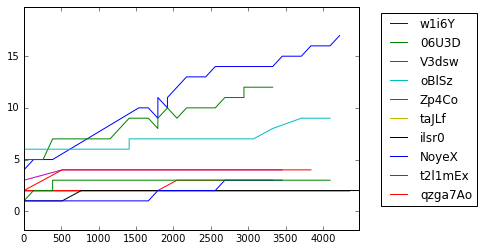

In [117]:
graph_posts(10, subset)

permalink dxT4woN
(1150.0, 1240.0) ylim


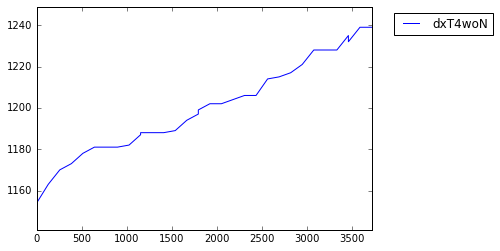

In [123]:
graph_posts(1, most_viral_subset)